<a href="https://colab.research.google.com/github/mani1105022/AI-Based-Cyber-Security-Threats-Prediction-AI-Agent/blob/main/Sql_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SQL TASK**

*TASK : Employee Database Management & Analysis*

Prompt: Import Libraries & Load Dataset

In [ ]:

import pandas as pd
import sqlite3

# Load the dataset CSV files
books = pd.read_csv("/content/books.csv")
members = pd.read_csv("/content/members.csv")
issue_records = pd.read_csv("/content/issue_records.csv")

books, members, issue_records


(   book_id               title          author
 0        1       Python Basics       Mark Lutz
 1        2  Data Science Intro      Nina Smith
 2        3    Machine Learning       Andrew Ng
 3        4       Deep Learning  Ian Goodfellow
 4        5    Database Systems         Elmasri,
    member_id member_name
 0          1        Asha
 1          2        Bala
 2          3      Charan
 3          4       Divya
 4          5        Esha,
    issue_id  member_id  book_id  issue_date return_date
 0         1          1        3  2025-01-10         NaN
 1         2          2        1  2025-01-11  2025-01-20
 2         3          3        4  2025-01-12         NaN
 3         4          4        2  2025-01-13  2025-01-25
 4         5          5        5  2025-01-14         NaN)

Prompt: Create a database and tables for books, members, and issue_records.

In [ ]:
conn = sqlite3.connect("library.db")
cursor = conn.cursor()

# Create books table
cursor.execute("""
CREATE TABLE IF NOT EXISTS books (
    book_id INTEGER PRIMARY KEY,
    title TEXT,
    author TEXT
);
""")

# Create members table
cursor.execute("""
CREATE TABLE IF NOT EXISTS members (
    member_id INTEGER PRIMARY KEY,
    member_name TEXT
);
""")

# Create issue_records table
cursor.execute("""
CREATE TABLE IF NOT EXISTS issue_records (
    issue_id INTEGER PRIMARY KEY,
    member_id INTEGER,
    book_id INTEGER,
    issue_date TEXT,
    return_date TEXT,
    FOREIGN KEY(member_id) REFERENCES members(member_id),
    FOREIGN KEY(book_id) REFERENCES books(book_id)
);
""")

conn.commit()

print("Tables created successfully.")


Tables created successfully.


Prompt: Insert all CSV data into SQL tables.

In [ ]:
books.to_sql("books", conn, if_exists="replace", index=False)
members.to_sql("members", conn, if_exists="replace", index=False)
issue_records.to_sql("issue_records", conn, if_exists="replace", index=False)

print("Data Inserted Successfully!")


Data Inserted Successfully!


Prompt: Display all books.

In [ ]:
# Prompt 4: Display All Books

pd.read_sql_query("SELECT * FROM books", conn)


,book_id,title,author
0,1,Python Basics,Mark Lutz
1,2,Data Science Intro,Nina Smith
2,3,Machine Learning,Andrew Ng
3,4,Deep Learning,Ian Goodfellow
4,5,Database Systems,Elmasri


Prompt: Retrieve all books issued to Member ID = 1.

In [ ]:
pd.read_sql_query("""
SELECT m.member_name, b.title, b.author, i.issue_date, i.return_date
FROM issue_records i
JOIN members m ON i.member_id = m.member_id
JOIN books b ON i.book_id = b.book_id
WHERE m.member_id = 1;
""", conn)


,member_name,title,author,issue_date,return_date
0,Asha,Machine Learning,Andrew Ng,2025-01-10,None


Prompt: Count how many books each member borrowed.

In [ ]:
pd.read_sql_query("""
SELECT m.member_name, COUNT(i.book_id) AS total_books_borrowed
FROM members m
LEFT JOIN issue_records i ON m.member_id = i.member_id
GROUP BY m.member_name;
""", conn)


,member_name,total_books_borrowed
0,Asha,1
1,Bala,1
2,Charan,1
3,Divya,1
4,Esha,1


Prompt: Update return date for issue_id = 1

In [ ]:
cursor.execute("""
UPDATE issue_records
SET return_date = '2025-01-30'
WHERE issue_id = 1;
""")

conn.commit()

# Verify
pd.read_sql_query("SELECT * FROM issue_records", conn)


,issue_id,member_id,book_id,issue_date,return_date
0,1,1,3,2025-01-10,2025-01-30
1,2,2,1,2025-01-11,2025-01-20
2,3,3,4,2025-01-12,None
3,4,4,2,2025-01-13,2025-01-25
4,5,5,5,2025-01-14,None


Prompt : Delete issue records where return date is NULL

In [ ]:
cursor.execute("""
DELETE FROM issue_records
WHERE return_date IS NULL;
""")

conn.commit()

# Verify
pd.read_sql_query("SELECT * FROM issue_records", conn)


,issue_id,member_id,book_id,issue_date,return_date
0,1,1,3,2025-01-10,2025-01-30
1,2,2,1,2025-01-11,2025-01-20
2,4,4,2,2025-01-13,2025-01-25


 Visualization: Books borrowed per member

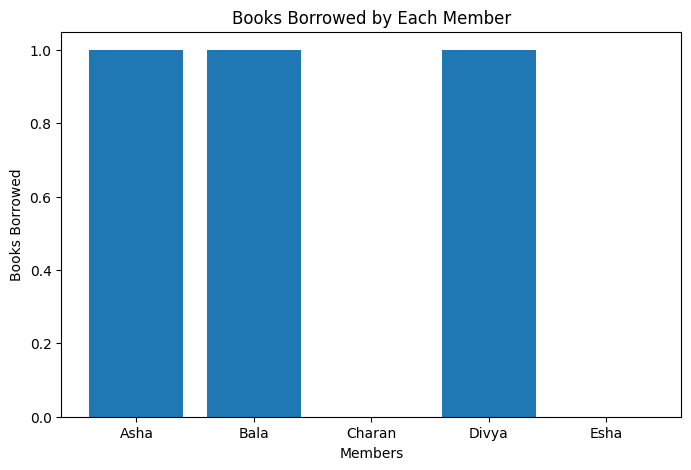

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_sql_query("""
SELECT m.member_name, COUNT(i.book_id) AS books_borrowed
FROM members m
LEFT JOIN issue_records i ON m.member_id = i.member_id
GROUP BY m.member_name;
""", conn)

plt.figure(figsize=(8,5))
plt.bar(data['member_name'], data['books_borrowed'])
plt.xlabel("Members")
plt.ylabel("Books Borrowed")
plt.title("Books Borrowed by Each Member")
plt.show()
